In [2]:
import torch
from torch import nn
from d2l import torch as d2l

/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


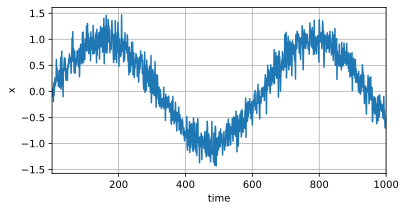

In [3]:
T = 1000
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6,3))

In [5]:
tau = 4
features = torch.zeros((T - tau, tau))

In [8]:
for i in range(tau):
    features[:, i] = x[i:T-tau + i] # 存放x-1 x-2 ……x-t # 顺序cang
labels = x[tau:].reshape((-1, 1))

In [9]:
batch_size, n_train = 16, 600
train_iter = d2l.load_array((features[:n_train], labels[:n_train]), batch_size, is_train=True) # 数据迭代器

In [10]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

In [11]:
def get_net():
    net = nn.Sequential(nn.Linear(4, 10), 
                        nn.ReLU(),
                        nn.Linear(10, 1))
    net.apply(init_weights)
    return net;

In [12]:
loss = nn.MSELoss(reduction='none')

In [13]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.sum().backward()
            trainer.step()
        print(f'epoch {epoch + 1}, '
              f'loss"{d2l.evaluate_loss(net, train_iter, loss):f}')
        

In [14]:
net = get_net()

In [15]:
train(net, train_iter, loss, 5, 0.01)

epoch 1, loss"0.056287
epoch 2, loss"0.050536
epoch 3, loss"0.049049
epoch 4, loss"0.048644
epoch 5, loss"0.054888


/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


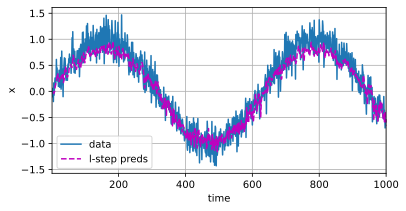

In [18]:
onestep_preds = net(features)
d2l.plot([time, time[tau:]],
          [x.detach().numpy(), onestep_preds.detach().numpy()], 'time',
          'x', legend=['data', 'l-step preds'], xlim=[1, 1000],
          figsize=(6, 3))

In [19]:
max_steps = 64

In [20]:
features = torch.zeros((T - tau - max_steps + 1, tau + max_steps)) # T * 64

In [21]:
for i in range(tau):
    features[:, i] = x[i: i + T - tau - max_steps + 1] # 初始化